<a href="https://colab.research.google.com/github/caorozcoc27/08MBID_Trabajo_Practico/blob/main/08MBID_TP_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Python


Nombre: Camilo Andres Orozco Camargo

In [1]:
#Importamos modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from numpy import corrcoef, transpose, arange

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields, sep=";", decimal=",")
    return df

In [2]:
# Cargar datos
speed_test = upload_files()
print(speed_test.shape)
speed_test.head()


Saving Ookla_Dataset.csv to Ookla_Dataset (2).csv
User uploaded file "Ookla_Dataset (2).csv" with length 15827729 bytes
(183189, 12)


,TEST_DATE,TIME_RANGE,CLIENT_REGION_NAME,CLIENT_CITY,OPERATOR,RAT,CONNECTION_TYPE,OS,DOWNLOAD_KBPS,UPLOAD_KBPS,LATENCY,CONNECTION_QUALITY
0,2022-03-01,BusyHour,Bogota,Bogota,Operador C,4G,LTE,Android,2609,2499,239,0.2007
1,2022-03-01,BusyHour,Bolivar,Cartagena,Operador T,4G,LTE,Android,43292,21598,68,0.8212
2,2022-03-01,BusyHour,Bogota,Bogota,Operador T,4G,LTE,Android,2312,7057,390,0.2156
3,2022-03-01,BusyHour,Bogota,Bogota,Operador T,4G,LTE,Android,31246,20337,21,0.7060
4,2022-03-01,BusyHour,Bogota,Bogota,Operador T,4G,LTE,Android,21526,20694,31,0.6180


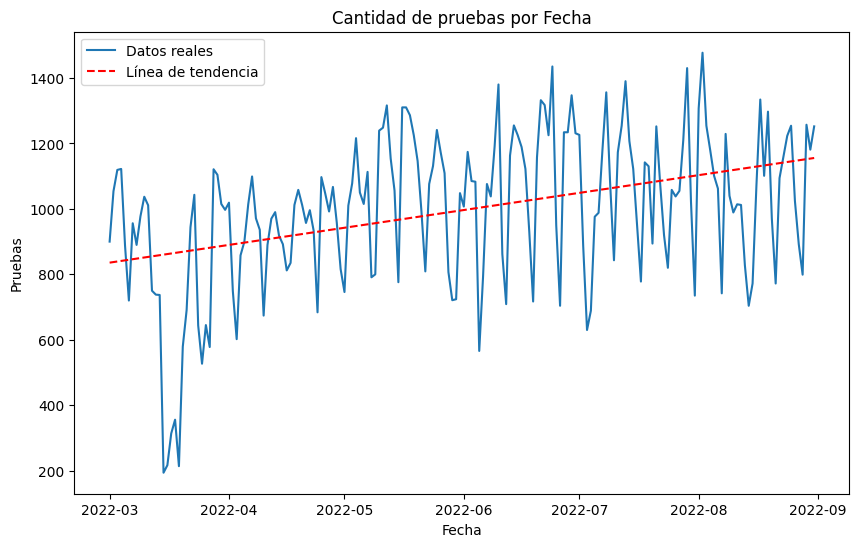

In [3]:
# Evolucion cantidad de pruebas
speed_test['TEST_DATE'] = pd.to_datetime(speed_test['TEST_DATE'])

serie_tiempo = speed_test.groupby('TEST_DATE').size()
serie_tiempo_total = (serie_tiempo.index - serie_tiempo.index.min()).days.values

coeficientes = np.polyfit(serie_tiempo_total, serie_tiempo.values, 1)
polinomio = np.poly1d(coeficientes)

plt.figure(figsize=(10, 6))
plt.plot(serie_tiempo.index, serie_tiempo.values, label='Datos reales')
plt.plot(serie_tiempo.index, polinomio(serie_tiempo_total), label='Línea de tendencia', linestyle='--', color='red')
plt.title('Cantidad de pruebas por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Pruebas')
plt.legend()
plt.show()

<ipython-input-4-b3acbff1f608>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = speed_test.groupby(['TEST_DATE', 'TIME_RANGE']).mean()['CONNECTION_QUALITY'].unstack()


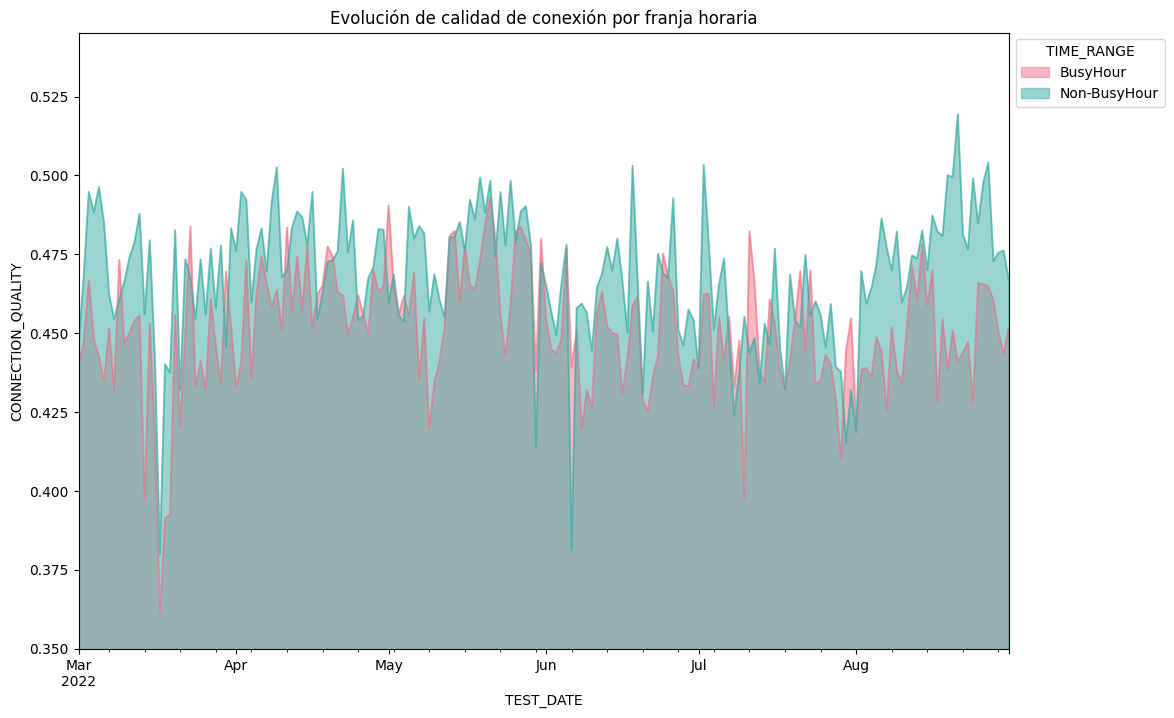

In [4]:
# Evolucion Connection Quality por franja horaria
colors = sns.color_palette("husl", 2)

df_grouped = speed_test.groupby(['TEST_DATE', 'TIME_RANGE']).mean()['CONNECTION_QUALITY'].unstack()

ax = df_grouped.plot.area(figsize=(12, 8), title='Evolución de calidad de conexión por franja horaria', stacked=False, alpha=0.5, color=colors)
plt.xlabel('TEST_DATE')
plt.ylabel('CONNECTION_QUALITY')
plt.legend(title='TIME_RANGE', loc='upper left', bbox_to_anchor=(1, 1))

ax.set_ylim(bottom=0.35)

plt.show()

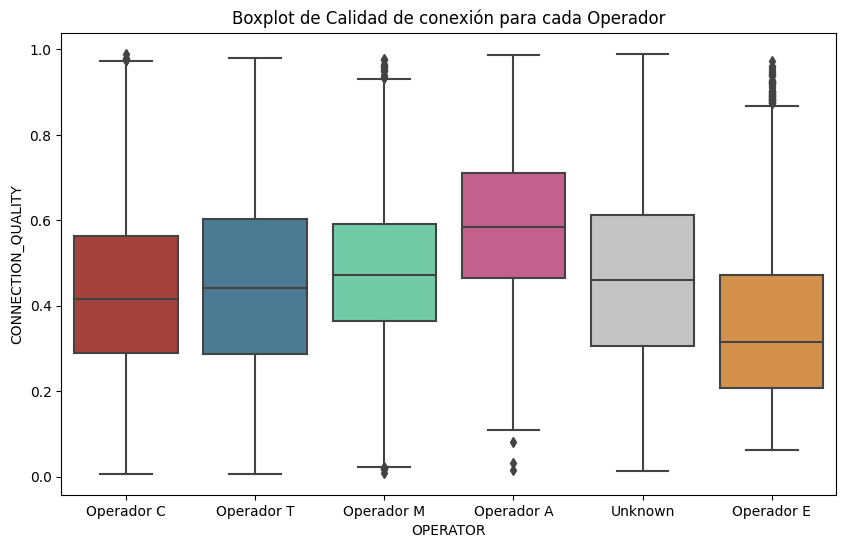

In [14]:
# Gráfico de caja CONNECTION_QUALITY
plt.figure(figsize=(10, 6))

custom_colors = {'Operator1': '#B73229', 'Operator2': '#3F7F9F', 'Operator3': '#64D9A9', 'Operator4': '#D3518A', 'Operator5': '#C4C4C4', 'Operator6': '#EB9135'}

sns.boxplot(x='OPERATOR', y='CONNECTION_QUALITY', data=speed_test, palette=custom_colors.values())
plt.title('Boxplot de Calidad de conexión para cada Operador')
plt.show()